In [1]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np

# Excel data as pandas dataframe
#filepath = r'C:\Users\Agni\Documents\MIT 2017-18\6.884\neuro-soc\Data\neuro_dataset.xlsx'
filepath = r'/Users/agnikumar/Documents/MIT 2019-20/neuro-soc/Data/neuro_compiled.xlsx'

df_original = pd.read_excel(filepath, sheet_name=0)
# print(df_original)
# print(df_original['Hospital Type (DH)'])

In [2]:
# Categorical to numerical dataframe (contains only the originally categorical columns)
categorical_cols_df = df_original[['Time Zone', 'State', 'SEX', 'Service Line', 'Reason for Consult', 'Provider Diagnosis', 'Hospital Type (DH)', 'Stroke Center',  'Advanced Comprehensive Stroke Center']].copy()
# print(categorical_cols_df)

categorical_numerical_df = categorical_cols_df.apply(lambda x: pd.factorize(x)[0])
# print(categorical_numerical_df)

In [3]:
# COMPLETE INPUT DATAFRAME
# Input features (numerical cols from originally categorical ones, also originally numerical ones)
# ['Visit Initiated', 'Age', 'Bed Count', 'Total ER Visits (DH)']

all_inputs_df = categorical_numerical_df.copy()
all_inputs_df['Visit Initiated'] = df_original['Visit Initiated']
all_inputs_df['Age'] = df_original['Age']
all_inputs_df['Bed Count'] = df_original['Bed Count']
all_inputs_df['Total ER Visits (DH)'] = df_original['Total ER Visits (DH)']

all_inputs_df['Visit Initiated (Float)'] = df_original['Visit Initiated (Float)']

# print(all_inputs_df)

In [4]:
# GENERATING y COLUMN (with 136 entries for 136 weeks)
# New dataframe with demand quantity (by week) column

df = df_original.copy() # for weekly examination
df['Name'] = 'Patient'
df['Quantity'] = 1
df['Visit Initiated'] = pd.to_datetime(df['Visit Initiated']) - pd.to_timedelta(7, unit='d')
df = df.groupby(['Name', pd.Grouper(key='Visit Initiated', freq='W-MON')])['Quantity'].sum().reset_index().sort_values('Visit Initiated')
df['date_delta'] = (df['Visit Initiated'] - df['Visit Initiated'].min())  / np.timedelta64(1,'D')

#quantity_df = df['date_delta']
quantity_df = df.filter(['Quantity'], axis=1)
# print(quantity_df)

In [5]:
# GENERATING complete y COLUMN with script 

def populate(df_input, col):
    """ 
    df_input: input dataframe
    col: string name of the column aggregating
    """
    df = df_input.copy() # don't modify original
    a = df[col].values.T.tolist()
    b = []
    for item in a:
        item = int(item)
        for i in range(item):
            b.append(item)
    # convert b back into a DataFrame
    df_output = pd.DataFrame(b, columns = list(df.columns.values))
    return df_output

quantity_df_extended = populate(quantity_df, 'Quantity')
# print(quantity_df_extended)

In [6]:
#y = df['Quantity'].copy()
#y = df_original
#print(y.shape)

#print(all_inputs_df) #95256 rows x 14 columns
#print(quantity_df_extended) #95256 rows x 1 columns

combined_df = pd.concat([all_inputs_df, quantity_df_extended], axis=1)
#print(combined_df) #95256 rows x 15 columns

new_all_inputs = (combined_df.dropna(axis=0, how='any')).drop(['Visit Initiated'], axis=1)
#print(new_all_inputs)

y = new_all_inputs['Quantity']
x_inputs = new_all_inputs.drop(['Quantity'], axis=1)

# Create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(x_inputs, y, test_size=0.2)
#print(X_train.shape, y_train.shape)
#print(X_test.shape, y_test.shape)

print("---------------------------")
print("X_train:", X_train)
#print("y_train:", y_train)
#print("X_test:", X_test)
#print("y_test:", y_test)

---------------------------
X_train:        Time Zone  State  SEX  Service Line  Reason for Consult  \
94701          1      4    0             1                  74   
56507          1     16    1             1                   7   
79874          0     21    0             1                  74   
92282          1      8    0             1                  74   
63892          0     28    1             1                   4   
42512          1      2    1             1                   7   
33558          0     13    0             1                  20   
66591          1      8    1             1                   7   
75150          0     15    0             1                  74   
94481          0     21    0             2                  83   
56579          1      8    1             1                  74   
48233          1     11    1             1                  78   
55285          1      2    1             1                  78   
46342          1     19    1           

[823.71263549 812.8055709  781.22966494 744.56233647 733.78953252]
Score: 0.7973473529752485


Text(0, 0.5, 'Predictions')

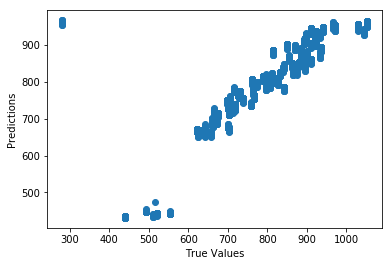

In [7]:
%matplotlib inline
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

print(predictions[0:5])

print("Score:", model.score(X_test, y_test))

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [8]:
# ONLY PROVIDER DIAGNOSIS

combined_df = pd.concat([all_inputs_df, quantity_df_extended], axis=1)
#print(combined_df) #95256 rows x 15 columns

new_all_inputs = (combined_df.dropna(axis=0, how='any')).drop(['Visit Initiated'], axis=1)
#print(new_all_inputs)

y = new_all_inputs['Quantity']
x_inputs = new_all_inputs.drop(['Quantity'], axis=1)

# TOGGLE ---------------------------------------------------------
#x_inputs = new_all_inputs.filter(['Provider Diagnosis','Time Zone','Visit Initiated (Float)'], axis=1)
#x_inputs = new_all_inputs.filter(['Reason for Consult','Time Zone','Visit Initiated (Float)'], axis=1)
#x_inputs = new_all_inputs.filter(['Service Line','Time Zone','Visit Initiated (Float)'], axis=1)
#x_inputs = new_all_inputs.filter(['Provider Diagnosis', 'Reason for Consult', 'Time Zone','Visit Initiated (Float)'], axis=1)

# Create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(x_inputs, y, test_size=0.2)
#print(X_train.shape, y_train.shape)
#print(X_test.shape, y_test.shape)
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

print(predictions[0:5])

print("Score:", model.score(X_test, y_test))

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation
# predicted: 64979 rows
predicted = cross_val_predict(lr, x_inputs, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0), color='black', linewidth=1)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

[883.03517687 874.08256099 960.80489324 701.22774429 879.90953295]
Score: 0.7838339364343996


NameError: name 'cross_val_predict' is not defined

In [ ]:
# LINEAR REGRESSION PLOT
from sklearn.model_selection import cross_val_predict
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt

combined_df = pd.concat([all_inputs_df, quantity_df_extended], axis=1)
#print(combined_df) #95256 rows x 15 columns

new_all_inputs = (combined_df.dropna(axis=0, how='any')).drop(['Visit Initiated'], axis=1)

# create df that contains 2 columns: all the inputs except for Quantity and Quantity

y = new_all_inputs['Quantity']
x_inputs = new_all_inputs.drop(['Quantity'], axis=1)
# print(all_inputs_df.head())
lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation
# predicted: 64979 rows
predicted = cross_val_predict(lr, x_inputs, y, cv=10)
# Create dataframe of inputs and predictions
predicted_dataframe = pd.DataFrame({'Observed Weekly Demand': y, 'Predicted Weekly Demand': predicted})

f, ax = plt.subplots()
sns.set_style("whitegrid")
sns.axes_style("whitegrid")
sns.set_context("paper")
sns.set_palette("husl")
weekly_demand_plot = sns.regplot(x="Observed Weekly Demand", y="Predicted Weekly Demand", data=predicted_dataframe)
plt.title("Linear Regression on Weekly Demand")
plt.savefig("weekly_demand_plot.png")

In [ ]:
# PLOT WEEKLY DEMAND
# print(combined_df.head())
print(combined_df.shape, combined_df['Visit Initiated'].shape, combined_df['Quantity'].shape)
# barplot = sns.catplot(x='Visit Initiated', y='Quantity', data=combined_df, kind='bar', aspect=4/3)

In [ ]:
# PLOT MONTHLY DEMAND

# generate new dataframe by month
df = df_original.copy() # (95256, 21)
df['Name'] = 'Patient'
df['Quantity'] = 1 # adds new column and sets all rows to this value

# another way to do groupby
# df.index = pd.to_datetime(df['Visit Initiated'],format='%m/%d/%y %I:%M%p')
# monthly_demand_df = df.groupby(by=[df.index.month, df.index.year]).sum()

df = df.rename(columns={"Visit Initiated": "Date"})
df.index = pd.to_datetime(df['Date'],format='%m/%d/%y %I:%M%p')
monthly_demand_df = df.groupby(pd.Grouper(freq='M')).sum()
# remove all columns except Quantity
cols_to_drop = list(set(list(monthly_demand_df)) - set(['Quantity']))
new_monthly_demand_df = monthly_demand_df.drop(cols_to_drop, axis=1)

# print(new_monthly_demand_df, new_monthly_demand_df.shape)
monthly_plot = new_monthly_demand_df.plot(legend=False)
plt.title("Monthly Demand Plot")
# print("after grouping", monthly_demand_df.shape, monthly_demand_df)

In [ ]:
# PLOT WEEKLY DEMAND

# generate new dataframe by week
df = df_original.copy() # (95256, 21)
df['Name'] = 'Patient'
df['Quantity'] = 1 # adds new column and sets all rows to this value

df = df.rename(columns={"Visit Initiated": "Date"})
df.index = pd.to_datetime(df['Date'],format='%m/%d/%y %I:%M%p')
weekly_demand_df = df.groupby(pd.Grouper(freq='W-MON')).sum()
# remove all columns except Quantity
cols_to_drop = list(set(list(weekly_demand_df)) - set(['Quantity']))
new_weekly_demand_df = weekly_demand_df.drop(cols_to_drop, axis=1)
new_weekly_demand_df = new_weekly_demand_df.iloc[:-1] # drop last month, low because of outlier

# print(new_monthly_demand_df, new_monthly_demand_df.shape)
weekly_plot = new_weekly_demand_df.plot(legend=False)
plt.title("Weekly Demand Plot")
# print("after grouping", new_weekly_demand_df.shape, new_weekly_demand_df.tail())

In [ ]:
# read tPA v.s. months csv file
filepath = r'/Users/nancyhung/Documents/MIT/neuro-soc/Data/tPA_month.xlsx'
tpa_df = pd.read_excel(filepath, sheet_name=0)
print(tpa_df)

In [ ]:
# plot month against TPA stroke occurrence

# polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
poly_reg = PolynomialFeatures(degree=3)
lin_reg = linear_model.LinearRegression()
X = tpa_df['month'].values
y = tpa_df['tpa_stroke'].values
X_poly = poly_reg.fit_transform(X.reshape(-1, 1))
# print(X_poly, y)
lin_reg.fit(X_poly, y.reshape(-1, 1))
y_pred = lin_reg.predict(X_poly)
print('Prediction scores', r2_score(y, y_pred))

# plot
# to print the actually calculated one
plt.scatter(X, y);
plt.plot(X, y_pred);

# nice plot but no access to equation
f, ax = plt.subplots()
sns.set_style("whitegrid")
sns.axes_style("whitegrid")
sns.set_context("paper")
sns.set_palette("husl")
tpa_plot = sns.regplot(x="month", y="tpa_stroke", data=tpa_df, order=3)
plt.title("Model of Month on tPA Stroke")
tpa_plot.set_ylim([0,700])
ax.set_xlabel("Date")
ax.set_ylabel("tPA Stroke Occurrence")